Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


Downloading Dataset & Preparing it

In [2]:
os.environ['KAGGLE_USERNAME']="fofejo"
os.environ['KAGGLE_KEY'] = "d8da0e434741c7dfd01d389bfd0426f7"
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 98% 132M/134M [00:04<00:00, 37.4MB/s]
100% 134M/134M [00:04<00:00, 30.7MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/multiclass-weather-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [4]:
# for dirname, _, filenames in os.walk('/content/dataset'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [6]:
root_dir = "/content/dataset"
os.listdir(root_dir)

['test.csv', 'shine', 'cloudy', 'sunrise', 'alien_test', 'foggy', 'rainy']

In [5]:
foggy = '/content/dataset/foggy'
cloudy = '/content/dataset/cloudy'
rainy = '/content/dataset/rainy'
shine = '/content/dataset/shine'
sunrise = '/content/dataset/sunrise'
test = '/content/dataset/alien_test'


In [7]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [8]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(224,224))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [9]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 362.47it/s]


In [10]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 224, 224, 3), (1498,))

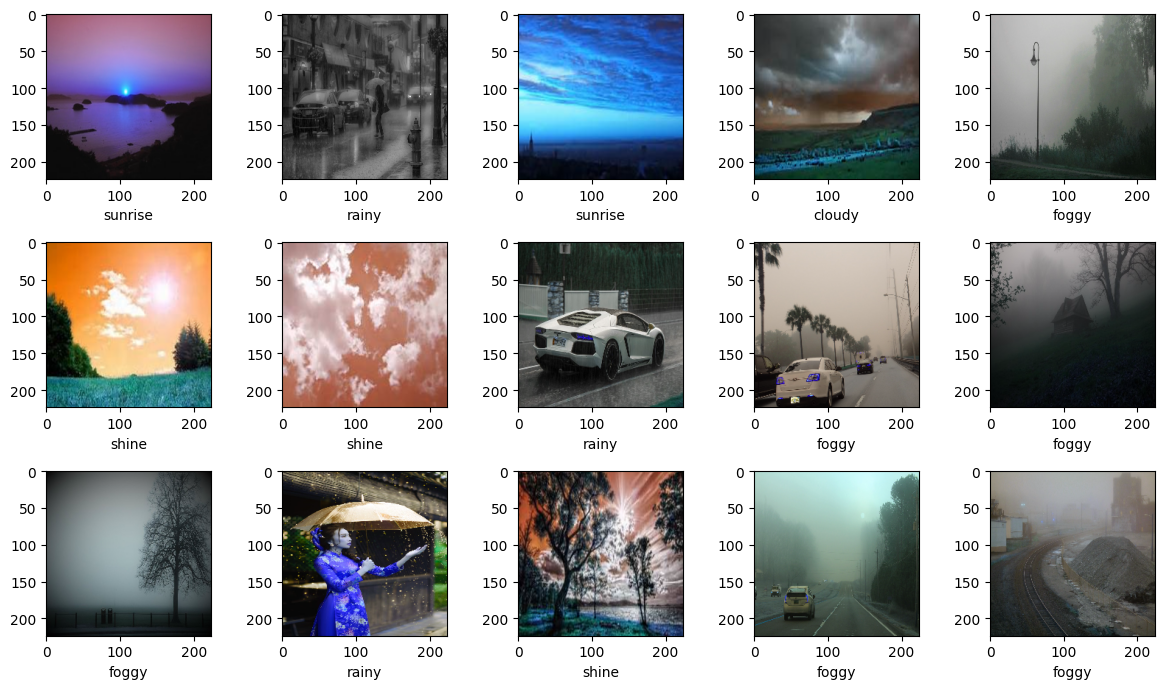

In [11]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Splitting dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_rem,y_train,y_rem = train_test_split(x,y,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_rem,y_rem,test_size=0.5,random_state=42)

In [14]:
img_size =224

x_train = np.array(x_train)/255.0
x_val = np.array(x_val)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1,img_size,img_size,3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)



In [15]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_val_lb = lb.fit_transform(y_val)
y_test_lb = lb.fit_transform(y_test)

In [16]:
y_train_lb.shape,y_test_lb.shape,y_val_lb.shape

((1198, 5), (150, 5), (150, 5))

Preparing Model

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout, Conv2D, MaxPooling2D
model =Sequential()

In [20]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [21]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 128)      

Compile Model

In [22]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, CSVLogger
checkpoint = ModelCheckpoint("model1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

csv_logger = CSVLogger("history.csv")

In [20]:
# from tensorflow.keras.models import load_model
# model = load_model("model1.h5")

Train Model

In [28]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=30,validation_data=(x_val,y_val_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop,csv_logger])

Results Analysis

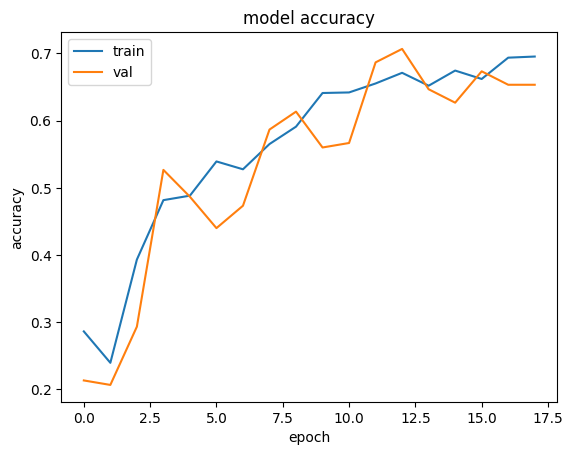

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

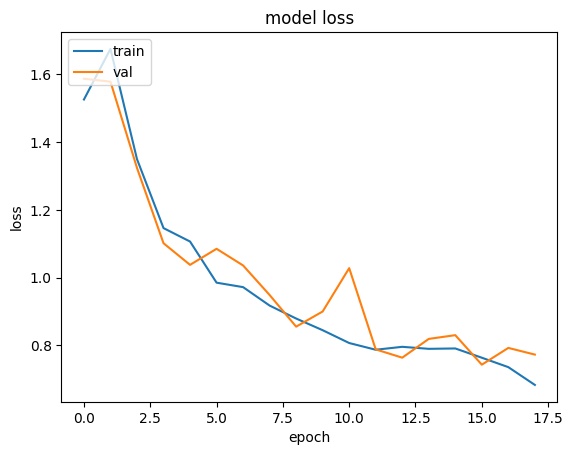

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

5/5 [==============================] - 15s 2s/step - loss: 0.6042 - accuracy: 0.7667
Loss: 0.6041921973228455
Accuracy: 0.7666666507720947


In [21]:
y_pred_proba = model.predict(x_test)

5/5 [==============================] - 19s 3s/step


In [26]:
from sklearn.metrics import roc_auc_score
n_classes = 5
roc_auc = []
for i in range(n_classes):
    roc_auc.append(roc_auc_score(y_test_lb[:, i], y_pred_proba[:, i]))




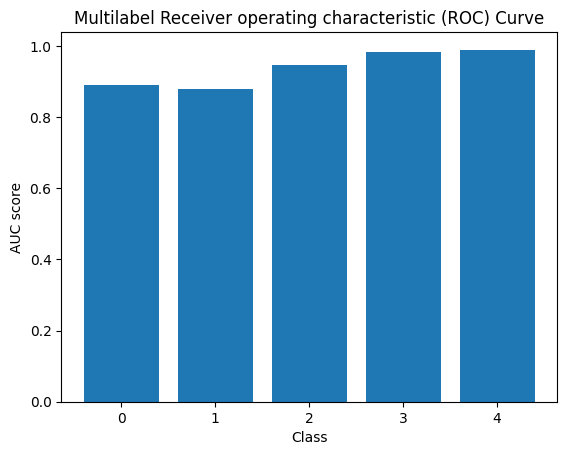

In [27]:

# Plot AUC score for each class
plt.bar(range(n_classes), roc_auc)

# Set the plot axis labels and title
plt.xlabel('Class')
plt.ylabel('AUC score')
plt.title('Multilabel Receiver operating characteristic (ROC) Curve')
plt.show()


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_test_labels = np.argmax(y_test_lb, axis=1)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
score = classification_report(y_test_labels, y_pred_labels)
cm1 = confusion_matrix(y_test_labels,y_pred_labels)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm1 = confusion_matrix(y_test_labels,y_pred_labels)


In [25]:
print(score)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        24
           1       0.61      0.45      0.52        31
           2       0.70      0.74      0.72        31
           3       0.85      1.00      0.92        28
           4       0.95      0.97      0.96        36

    accuracy                           0.77       150
   macro avg       0.75      0.76      0.75       150
weighted avg       0.76      0.77      0.76       150



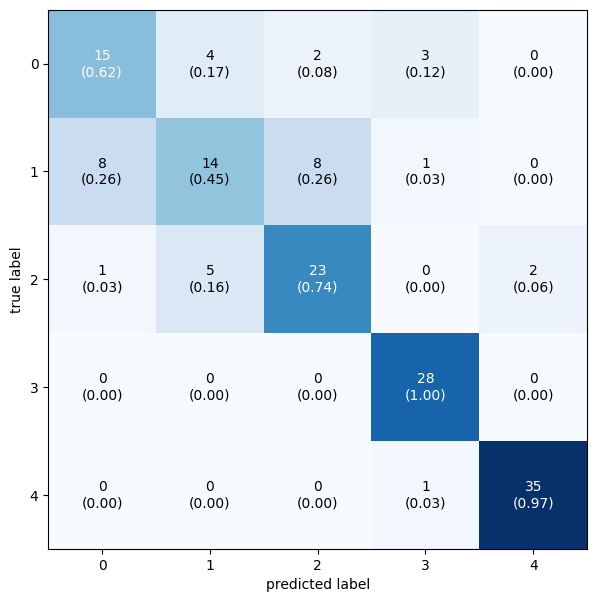

In [24]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat = cm1,figsize=(8,7),
                      show_normed = True);

In [21]:
cm3 = np.array([[ 3,  0, 14,  1,  6,],
 [ 5,  3, 14,  3,  6,],
 [ 2,  2, 14,  6,  7,],
 [ 2,  3, 11,  6,  6,],
 [ 1,  3, 18,  4, 10,]])

In [43]:
print(y_test_labels)

[2 1 4 1 2 1 1 4 3 4 0 0 1 4 1 2 3 2 3 4 3 4 2 3 0 2 3 4 3 3 2 1 0 4 4 2 3
 2 2 4 2 4 0 2 4 1 3 4 0 2 2 1 4 4 2 2 1 2 0 4 4 0 2 2 1 1 1 2 1 0 1 3 4 0
 1 0 1 1 4 0 1 3 1 1 4 1 1 4 1 3 1 3 0 0 4 3 1 0 3 0 0 0 4 3 4 1 4 4 0 4 4
 2 2 2 2 3 4 0 1 2 3 2 3 3 1 4 4 2 0 1 4 3 4 0 2 4 0 2 3 0 4 2 4 3 3 1 3 2
 3 3]


In [48]:
print(y_pred_labels)

[0 0 1 1 3 2 2 4 2 2 2 4 2 1 2 3 2 0 2 2 2 4 2 3 4 3 2 2 2 1 2 2 0 3 4 2 2
 4 4 4 2 2 0 3 2 2 2 4 2 2 3 3 3 2 4 2 4 2 2 2 1 2 4 2 2 3 2 4 4 4 4 3 2 4
 0 2 4 1 4 2 0 3 2 1 2 2 4 2 0 2 2 4 2 2 2 4 2 2 3 3 2 2 2 0 3 3 2 2 2 2 4
 4 2 1 3 0 2 4 2 1 4 2 3 1 0 4 4 4 4 2 2 4 0 0 2 2 2 2 2 2 3 2 4 4 4 4 2 2
 1 3]


In [46]:
print(y_pred_proba[:5])

[[5.7968044e-01 3.4679613e-01 7.2644711e-02 6.4613001e-04 2.3260647e-04]
 [4.0864751e-01 3.7181377e-01 2.1874133e-01 7.9689804e-04 4.9506502e-07]
 [3.5766244e-01 4.4908443e-01 1.9303781e-01 2.0875354e-04 6.4832252e-06]
 [3.4163427e-01 4.8861885e-01 1.6958065e-01 1.6238795e-04 3.6811737e-06]
 [6.7994252e-02 4.8821609e-04 2.8404091e-03 9.2866117e-01 1.5918138e-05]]


Preparing Modified Model

In [58]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

80134624/80134624 [==============================] - 0s 0us/step


In [59]:
for layer in vgg.layers:
    layer.trainable = False

In [60]:
model2 =Sequential()
model2.add(vgg)
model2.add(Flatten())
model2.add(Dense(5,activation="softmax"))
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 20,149,829
Trainable params: 125,445
Non-trainable params: 20,024,384
_________________________________________________________________


Compiling Modified Model


In [61]:
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

checkpoint = ModelCheckpoint("model2.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)
csv_logger = CSVLogger("history.csv")

In [ ]:
# model2=load_model("model2.h5")

Train Modified Model

In [62]:
batch_size=32
history2 =  model2.fit(x_train,y_train_lb,epochs=20,validation_data=(x_val,y_val_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop,csv_logger])

Epoch 1/20
38/38 [==============================] - ETA: 0s - loss: 1.1535 - accuracy: 0.6027 
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to model2.h5
38/38 [==============================] - 657s 17s/step - loss: 1.1535 - accuracy: 0.6027 - val_loss: 0.4765 - val_accuracy: 0.8333
Epoch 2/20
38/38 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8965 
Epoch 2: val_accuracy improved from 0.83333 to 0.86667, saving model to model2.h5
38/38 [==============================] - 653s 17s/step - loss: 0.3363 - accuracy: 0.8965 - val_loss: 0.3941 - val_accuracy: 0.8667
Epoch 3/20
38/38 [==============================] - ETA: 0s - loss: 0.2116 - accuracy: 0.9441 
Epoch 3: val_accuracy improved from 0.86667 to 0.89333, saving model to model2.h5
38/38 [==============================] - 643s 17s/step - loss: 0.2116 - accuracy: 0.9441 - val_loss: 0.3883 - val_accuracy: 0.8933
Epoch 4/20
38/38 [==============================] - ETA: 0s - loss: 0.1630 - ac

Modified Model Results Analysis

In [63]:
loss,accuracy = model2.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

5/5 [==============================] - 72s 14s/step - loss: 0.2437 - accuracy: 0.9133
Loss: 0.2437278777360916
Accuracy: 0.9133333563804626


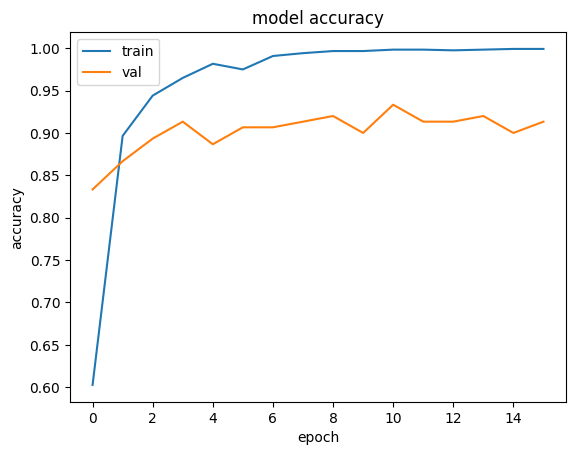

In [64]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

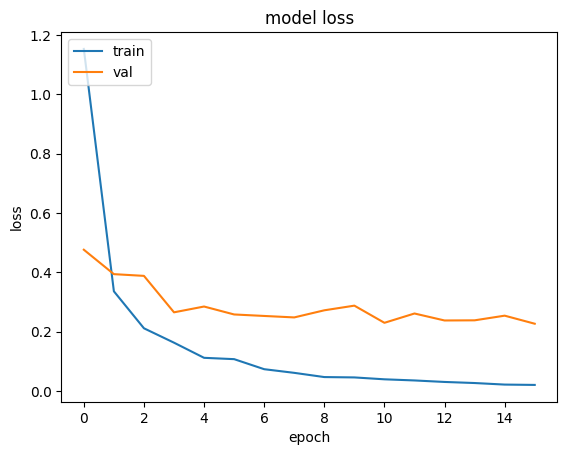

In [65]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [66]:
y_pred_proba = model2.predict(x_test)

5/5 [==============================] - 72s 14s/step


In [67]:
from sklearn.metrics import roc_auc_score
n_classes = 5
roc_auc = []
for i in range(n_classes):
    roc_auc.append(roc_auc_score(y_test_lb[:, i], y_pred_proba[:, i]))


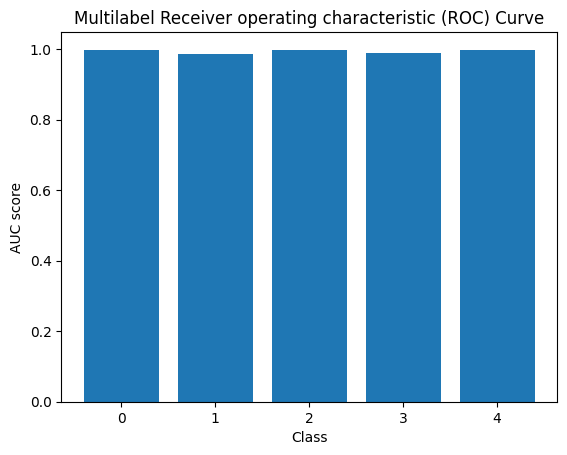

In [68]:
# Plot AUC score for each class
plt.bar(range(n_classes), roc_auc)

# Set the plot axis labels and title
plt.xlabel('Class')
plt.ylabel('AUC score')
plt.title('Multilabel Receiver operating characteristic (ROC) Curve')
plt.show()


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
y_test_labels = np.argmax(y_test_lb, axis=1)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
score = classification_report(y_test_labels, y_pred_labels)
cm = confusion_matrix(y_test_labels,y_pred_labels)


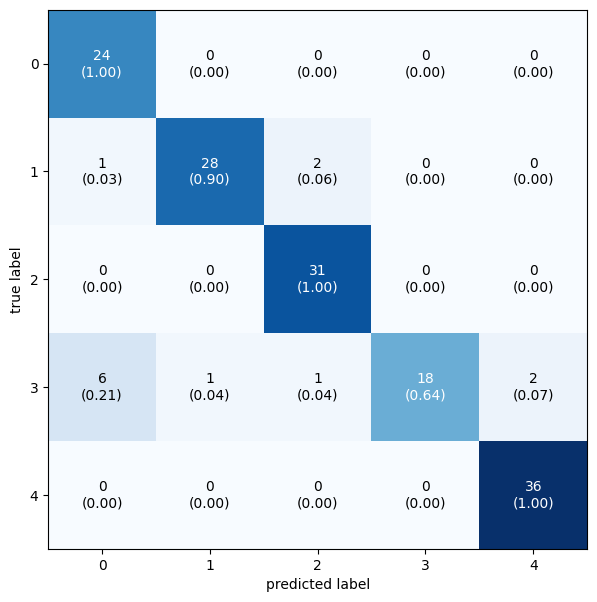

In [75]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['cloudy','foggy','rainy','shine','sunrise']
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                      show_normed = True);

In [70]:
print(cm)

[[24  0  0  0  0]
 [ 1 28  2  0  0]
 [ 0  0 31  0  0]
 [ 6  1  1 18  2]
 [ 0  0  0  0 36]]


In [71]:
print(score)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        24
           1       0.97      0.90      0.93        31
           2       0.91      1.00      0.95        31
           3       1.00      0.64      0.78        28
           4       0.95      1.00      0.97        36

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.90       150
weighted avg       0.93      0.91      0.91       150



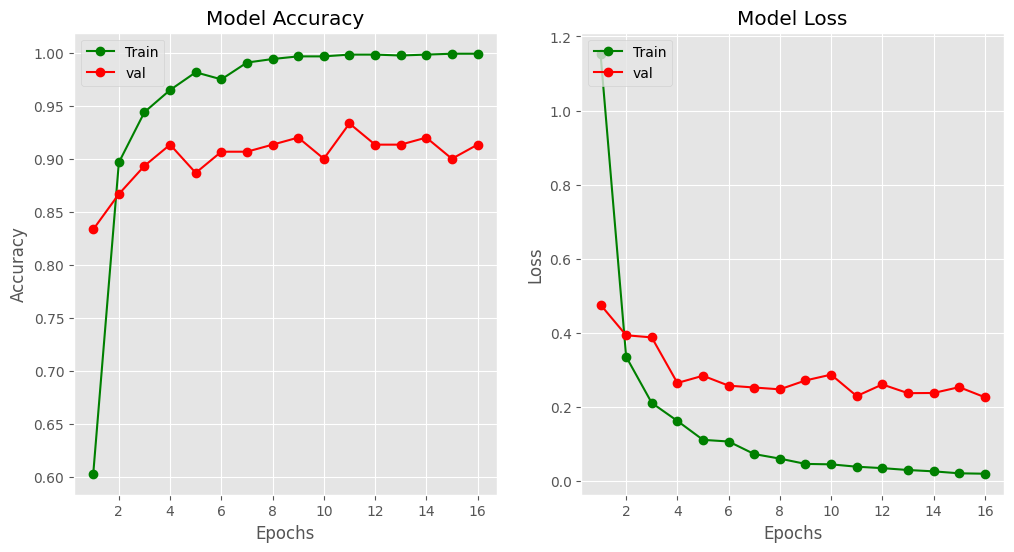

In [79]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,17)
plt.subplot(1,2,1)
plt.plot(epochs,history2.history["accuracy"],"go-")
plt.plot(epochs,history2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history2.history["loss"],"go-")
plt.plot(epochs,history2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [83]:
y_pred_labels = np.argmax(y_pred_proba, axis=1)


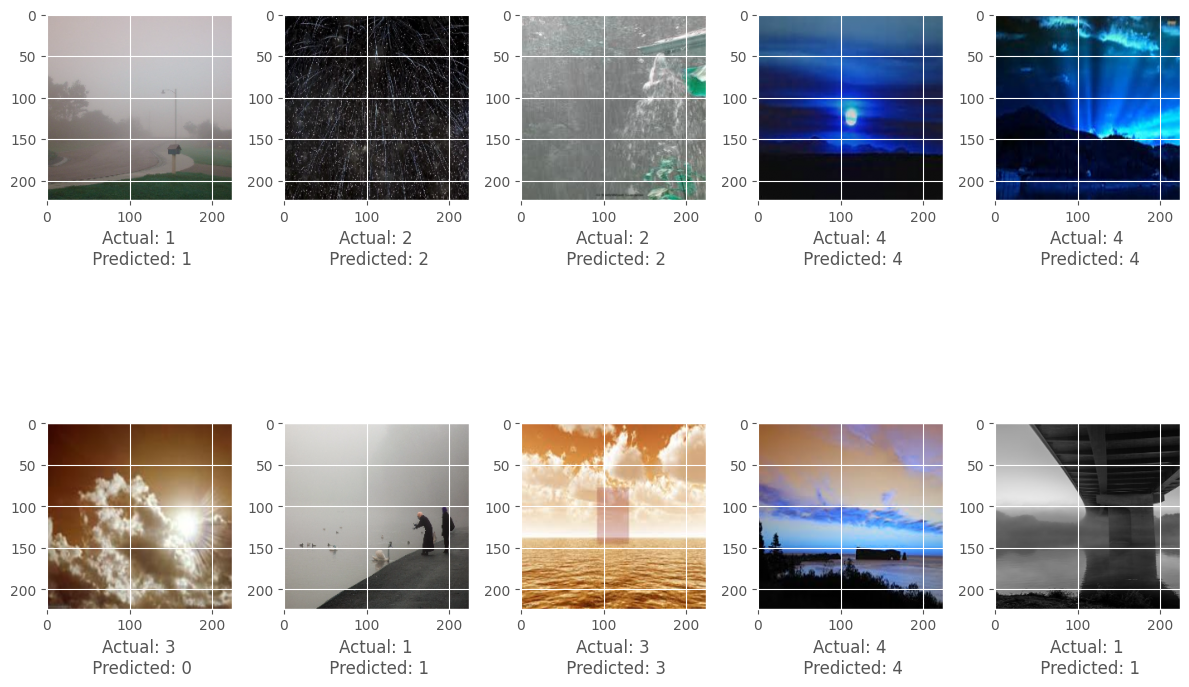

In [84]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred_labels[sample]}")
    
plt.tight_layout()    
plt.show() 